In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder,PolynomialFeatures,StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
%matplotlib inline

In [2]:
df = pd.read_csv('Temp2.csv')

In [3]:
df.head()

,Month,Sales
0,1-01,266.0
1,1-02,145.9
2,1-03,183.1
3,1-04,119.3
4,1-05,180.3


In [4]:
df.shape

(36, 2)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Month   36 non-null     object 
 1   Sales   36 non-null     float64
dtypes: float64(1), object(1)
memory usage: 708.0+ bytes


In [6]:
date = pd.date_range(start='1/1/2002',end='12/31/2004',freq='M')
date

DatetimeIndex(['2002-01-31', '2002-02-28', '2002-03-31', '2002-04-30',
               '2002-05-31', '2002-06-30', '2002-07-31', '2002-08-31',
               '2002-09-30', '2002-10-31', '2002-11-30', '2002-12-31',
               '2003-01-31', '2003-02-28', '2003-03-31', '2003-04-30',
               '2003-05-31', '2003-06-30', '2003-07-31', '2003-08-31',
               '2003-09-30', '2003-10-31', '2003-11-30', '2003-12-31',
               '2004-01-31', '2004-02-29', '2004-03-31', '2004-04-30',
               '2004-05-31', '2004-06-30', '2004-07-31', '2004-08-31',
               '2004-09-30', '2004-10-31', '2004-11-30', '2004-12-31'],
              dtype='datetime64[ns]', freq='M')

In [7]:
df['Time_Stamp'] = pd.DataFrame(date,columns=['Date'])

In [8]:
df.head()

,Month,Sales,Time_Stamp
0,1-01,266.0,2002-01-31
1,1-02,145.9,2002-02-28
2,1-03,183.1,2002-03-31
3,1-04,119.3,2002-04-30
4,1-05,180.3,2002-05-31


In [9]:
df = df.set_index("Time_Stamp")

In [10]:
df.head()

,Month,Sales
Time_Stamp,,
2002-01-31,1-01,266.0
2002-02-28,1-02,145.9
2002-03-31,1-03,183.1
2002-04-30,1-04,119.3
2002-05-31,1-05,180.3


In [11]:
df1 = df.drop('Month',axis=1)

In [12]:
df1.head()

,Sales
Time_Stamp,
2002-01-31,266.0
2002-02-28,145.9
2002-03-31,183.1
2002-04-30,119.3
2002-05-31,180.3


<Axes: xlabel='Time_Stamp'>

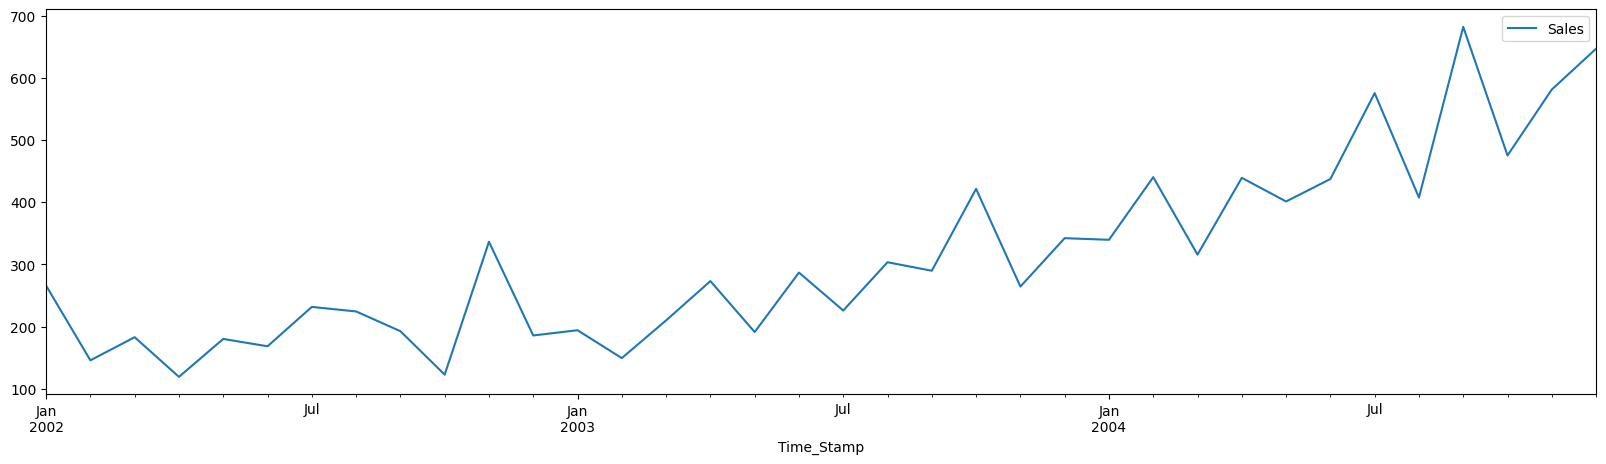

In [16]:
df1.plot(figsize=(20,5))

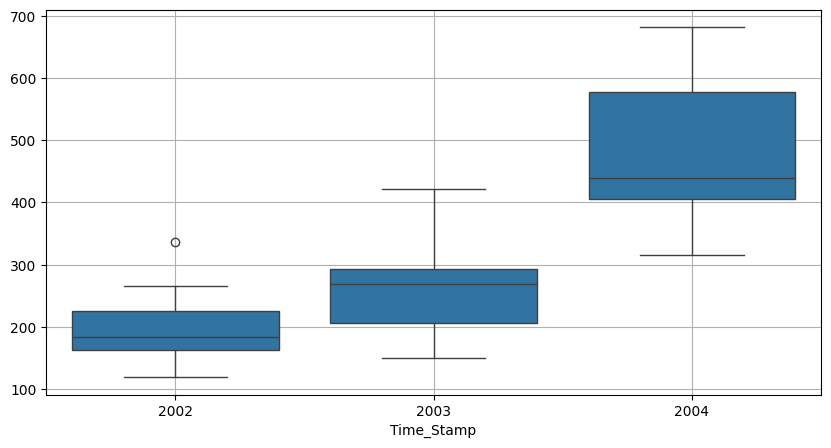

In [24]:
# EDA 
_,ax = plt.subplots(figsize=(10,5))
sns.boxplot(x=df1.index.year, y=df1.values[:,0],ax=ax)
plt.grid()

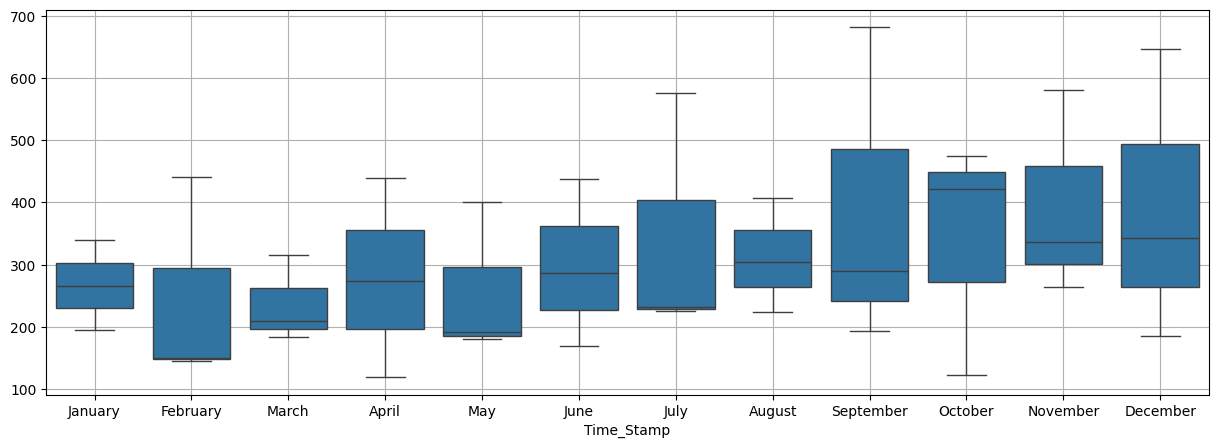

In [22]:
# EDA 
_,ax = plt.subplots(figsize=(15,5))
sns.boxplot(x=df1.index.month_name(), y=df1.values[:,0],ax=ax)
plt.grid()

In [25]:
monthly_sales = pd.pivot_table(df1,
                               values='Sales',
                               columns=df1.index.month_name(),
                               index=df1.index.year)

<Axes: xlabel='Time_Stamp'>

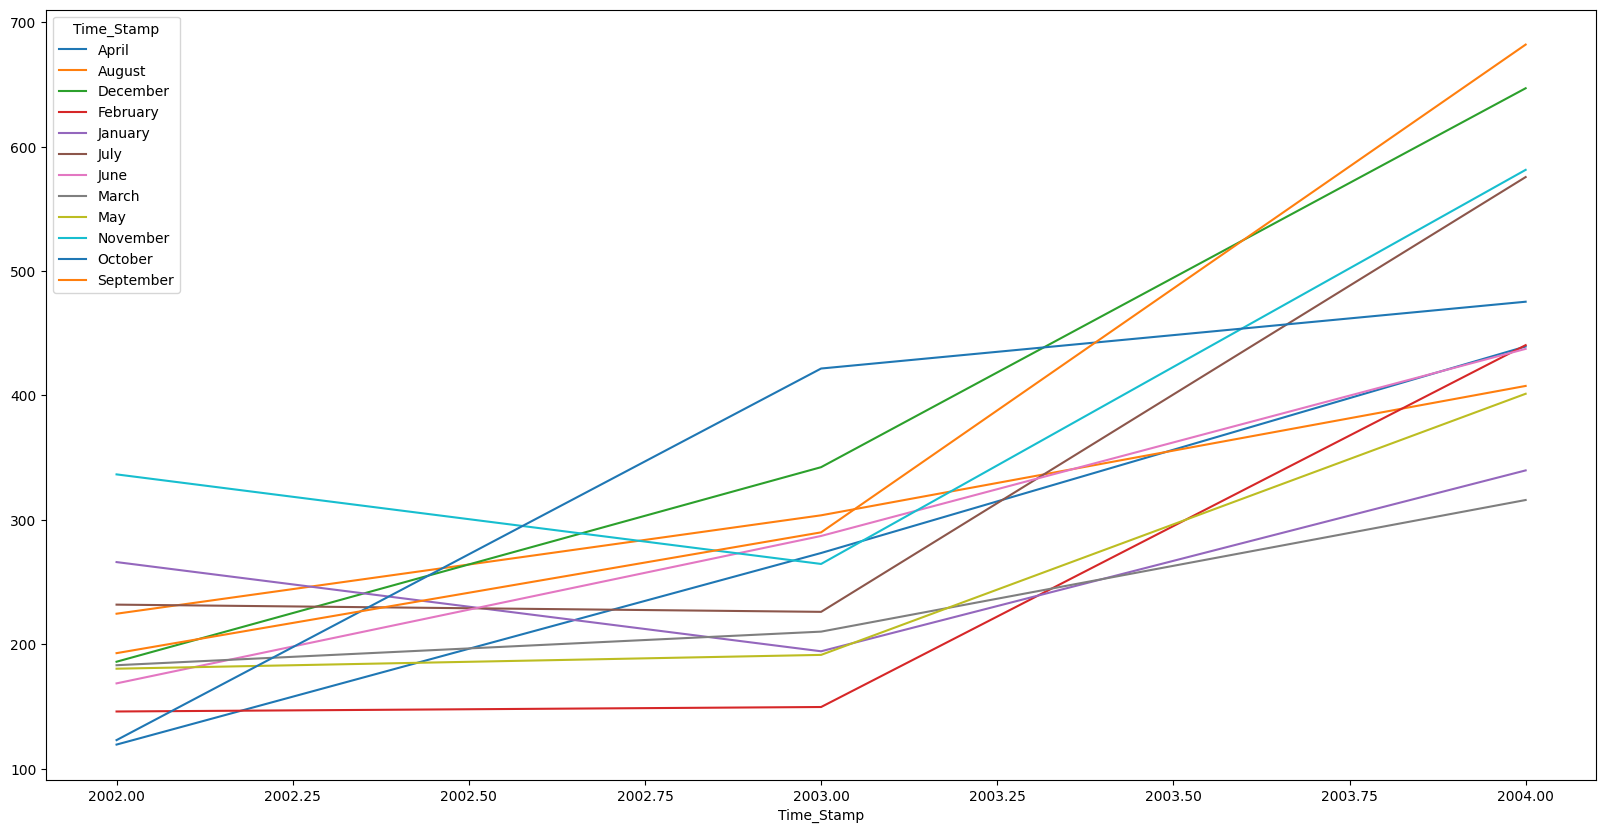

In [26]:
monthly_sales.plot(figsize=(20,10))


In [27]:
quaterly_turnover = pd.pivot_table(df1,
                               values='Sales',
                               columns=df1.index.quarter,
                               index=df1.index.year)

<Axes: xlabel='Time_Stamp'>

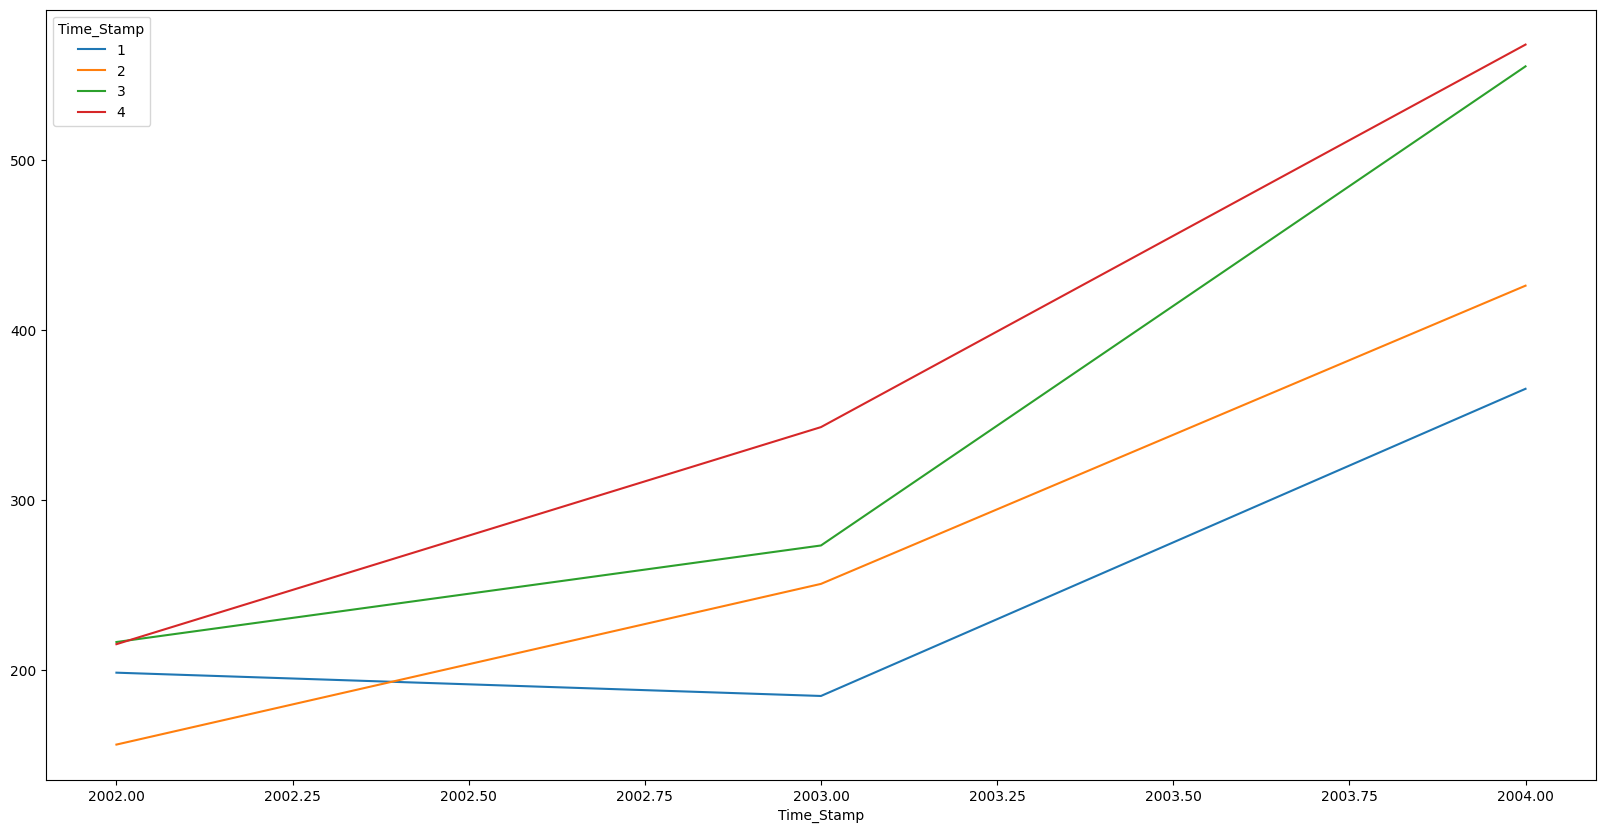

In [28]:
quaterly_turnover.plot(figsize=(20,10))

In [31]:
quaterly_turnover

Time_Stamp,1,2,3,4
Time_Stamp,,,,
2002,198.333333,156.033333,216.366667,215.100000
2003,184.633333,250.566667,273.166667,342.800000
2004,365.333333,426.000000,555.033333,567.833333


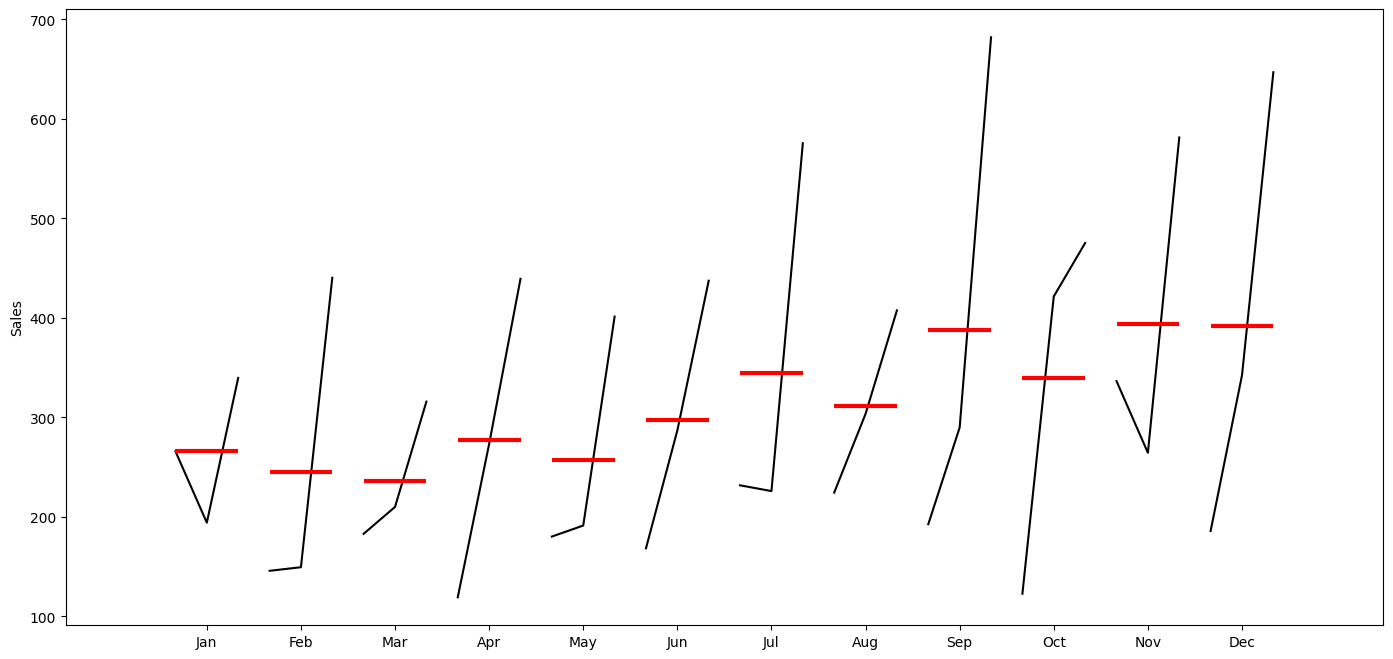

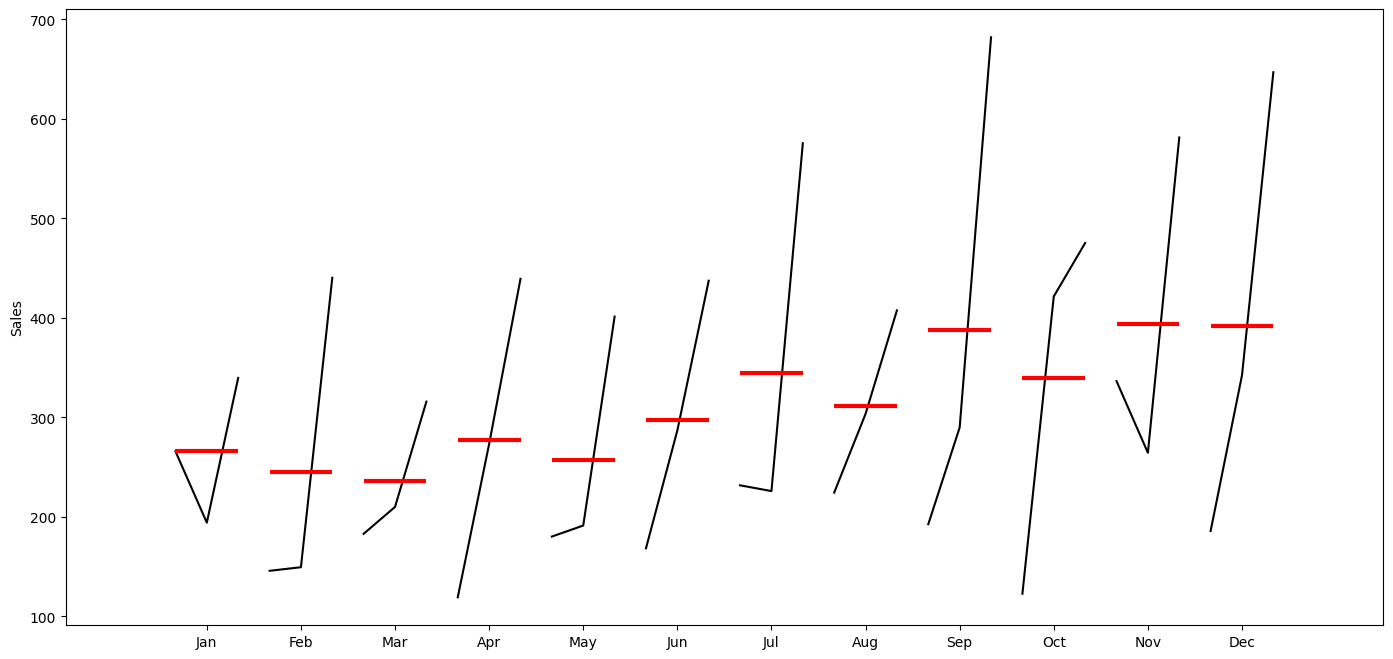

In [30]:
from pylab import rcParams
from statsmodels.graphics.tsaplots import month_plot

rcParams['figure.figsize'] = 17,8
plt.rc('xtick')
plt.rc('ytick')

month_plot(df1['Sales'],ylabel='Sales')
